## Machine Learning e analise explorat√≥ria de dados - Churn (Cancelamento de servi√ßos)

1. **Carregamento e Limpeza**: O dataset foi carregado, valores inv√°lidos tratados (ex.: `TotalCharges`), e vari√°veis categ√≥ricas convertidas para num√©ricas (ex.: `Churn`, `Partner`).

2. **An√°lise Explorat√≥ria (EDA)**: Estat√≠sticas descritivas foram calculadas e gr√°ficos (boxplots, histogramas, heatmaps) criados para entender distribui√ß√µes e rela√ß√µes entre vari√°veis.

3. **Visualiza√ß√µes**: Gr√°ficos de barras e correla√ß√£o foram usados para explorar padr√µes, como m√©todos de pagamento e churn.

4. **Prepara√ß√£o para Modelagem**: O dataset foi dividido em treino e teste (`train_test_split`) para prever churn.

5. **Insights**: Identificados per√≠odos cr√≠ticos de churn e recomenda√ß√µes para reten√ß√£o de clientes foram feitas.

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [311]:
df = pd.read_csv('Kaggle - Telco Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [313]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [314]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Qual a propor√ß√£o de clientes que deram chrun em rela√ß√£o ao total de clientes?

In [315]:
# total de clientes do dataset
tot_clients = df.shape[0]

In [316]:
tot_clients

7043

In [317]:
# filtrando apenas o que deram churn
churn_values = df[df['Churn'] == 'Yes']

In [318]:
# total de clientes que deram churn
tot_churn = churn_values.shape[0]

In [319]:
tot_churn

1869

In [320]:
print(f'O total de cliente do dataset √© {tot_clients}. \nO servi√ßo foi cancelado por {tot_churn} clientes. \nIsso representa {(tot_churn/tot_clients) * 100:.2f}%.')

O total de cliente do dataset √© 7043. 
O servi√ßo foi cancelado por 1869 clientes. 
Isso representa 26.54%.


### Qual a distribui√ß√£o dos gastos mensais dos clientes?

In [321]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [322]:
df['TotalCharges'].fillna(0)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

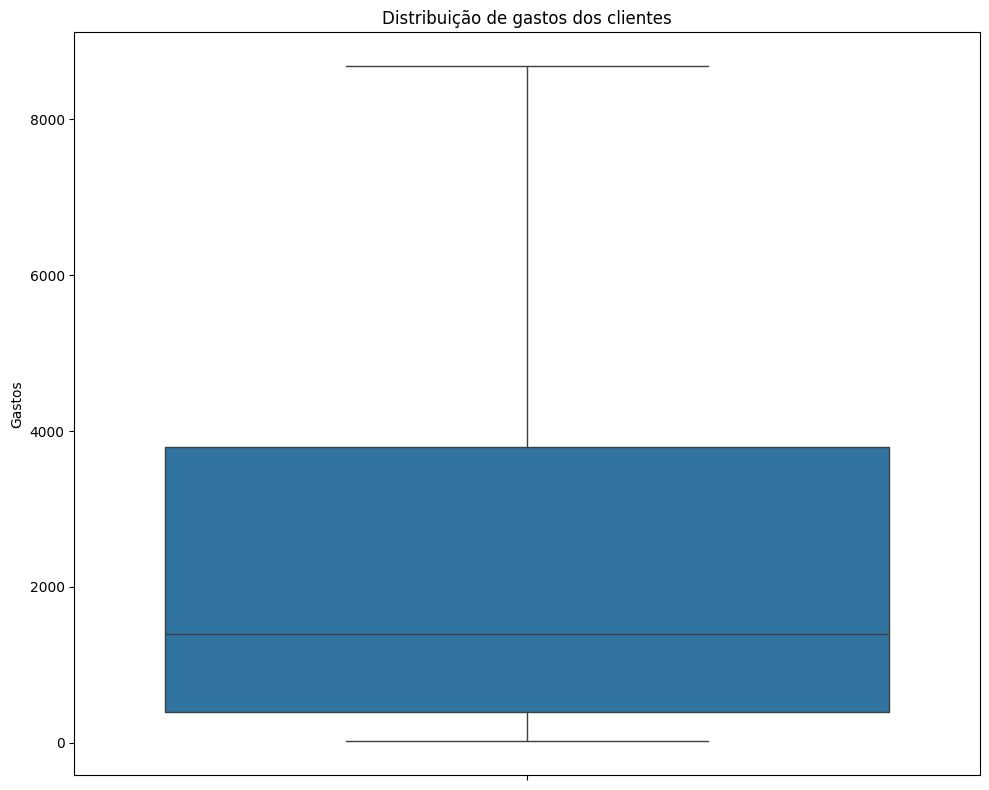

In [323]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y=df['TotalCharges'])
plt.title('Distribui√ß√£o de gastos dos clientes')
plt.ylabel('Gastos')
plt.tight_layout()

### Insights:
1. **Distribui√ß√£o Assim√©trica**: A diferen√ßa entre a m√©dia (**2283.30**) e a mediana (**1397.48**) sugere que a distribui√ß√£o pode ser assim√©trica, com alguns valores muito altos (outliers) puxando a m√©dia para cima.
2. **Clientes de Baixo Gasto**: O valor m√≠nimo (**18.80**) e o 1¬∫ quartil (**401.45**) indicam que uma parte significativa dos clientes tem gastos baixos.
3. **Clientes de Alto Gasto**: O 3¬∫ quartil (**3794.74**) e o valor m√°ximo (**8684.80**) mostram que h√° clientes com gastos significativamente maiores que a m√©dia.
4. **Alta Varia√ß√£o**: O desvio padr√£o alto (**2266.77**) refor√ßa que os valores de `TotalCharges` variam bastante entre os clientes.

### Decomponha o total de clientes pelos diferentes m√©todos de pagamento.

In [324]:
# Agrupar os dados por m√©todo de pagamento
payment_counts = df.groupby('PaymentMethod')['customerID'].count().sort_values(ascending=False).reset_index()

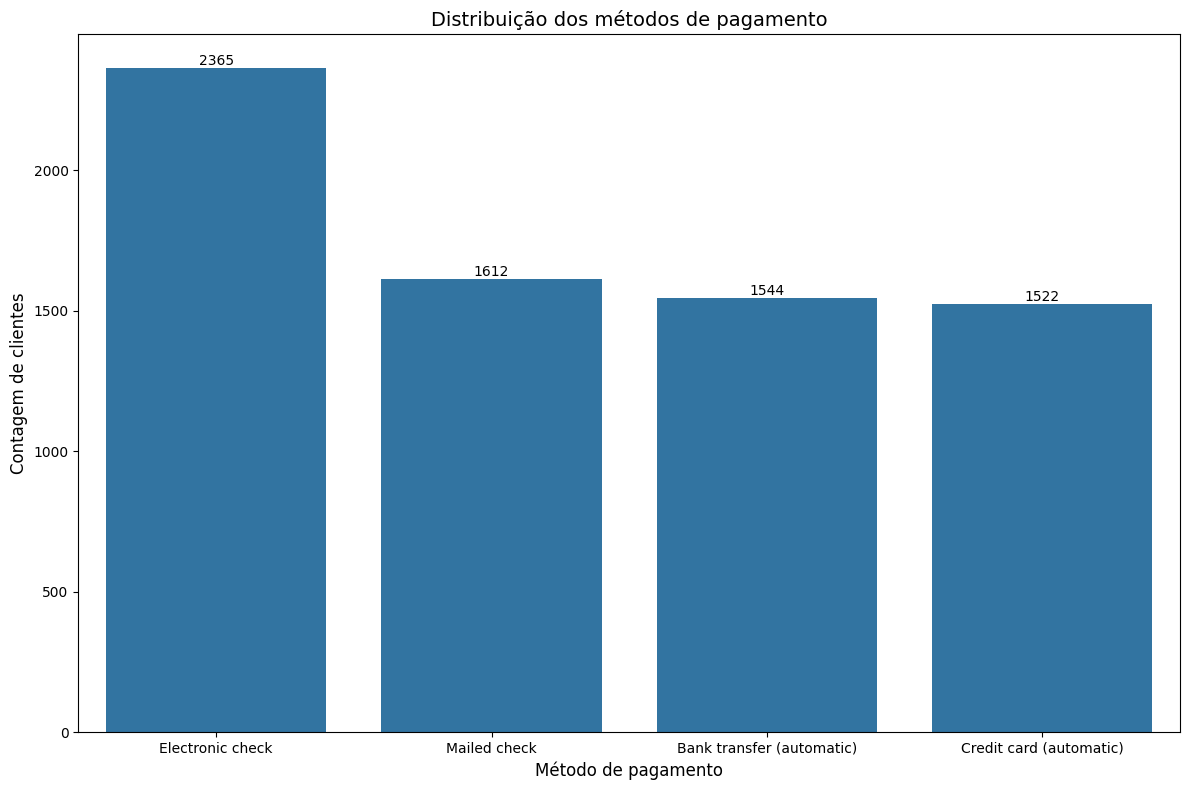

In [325]:
plt.figure(figsize=(12, 8))

# Criar o gr√°fico de barras
sns.barplot(data=payment_counts, x='PaymentMethod', y='customerID')

# Adicionar r√≥tulos e t√≠tulo
plt.xlabel('M√©todo de pagamento', fontsize=12)
plt.ylabel('Contagem de clientes', fontsize=12)
plt.title('Distribui√ß√£o dos m√©todos de pagamento', fontsize=14)

# Adicionar valores nas barras
for index, row in payment_counts_sorted.iterrows():
    plt.text(index, row['customerID'], f"{row['customerID']}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- **O m√©todo mais usado √© "Electronic Check"**, com 2365 clientes. Isso pode indicar que muitos clientes preferem pagamentos digitais, mas n√£o autom√°ticos.
    
- **Os pagamentos autom√°ticos (Bank Transfer e Credit Card) t√™m n√∫meros semelhantes**, com 1544 e 1522 clientes, respectivamente. Isso sugere que uma boa parte dos clientes opta por comodidade.
    
- **O "Mailed Check" tem 1612 clientes**, mostrando que ainda h√° um n√∫mero relevante de pessoas que preferem esse m√©todo tradicional.
    
- **Poss√≠vel rela√ß√£o com churn**: se a empresa estiver analisando churn, pode ser interessante verificar se os clientes que pagam via "Electronic Check" t√™m maior taxa de cancelamento, pois geralmente esse m√©todo est√° mais associado a clientes menos engajados.

### Verifique a distribui√ß√£o de g√™nero, possuir um parceiro, senioridade e possuir dependentes.

In [326]:
variaveis_binarias = ['gender', 'Partner', 'SeniorCitizen', 'Dependents']

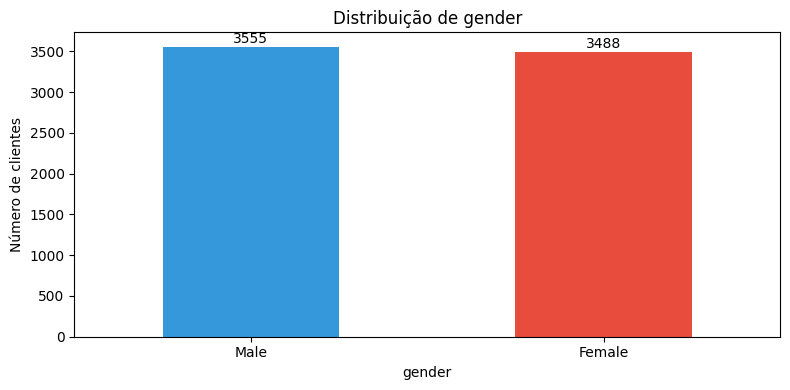

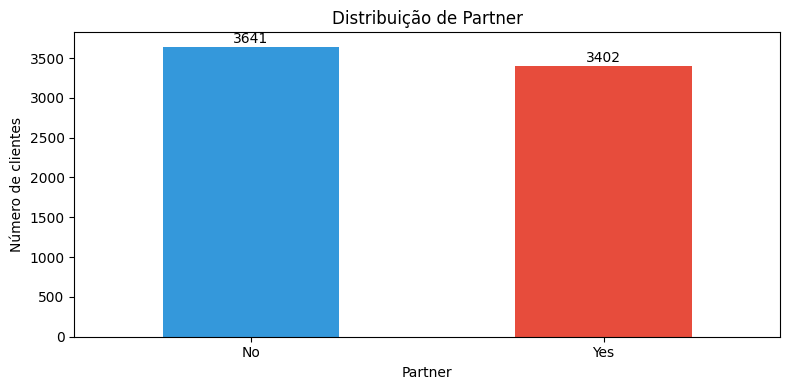

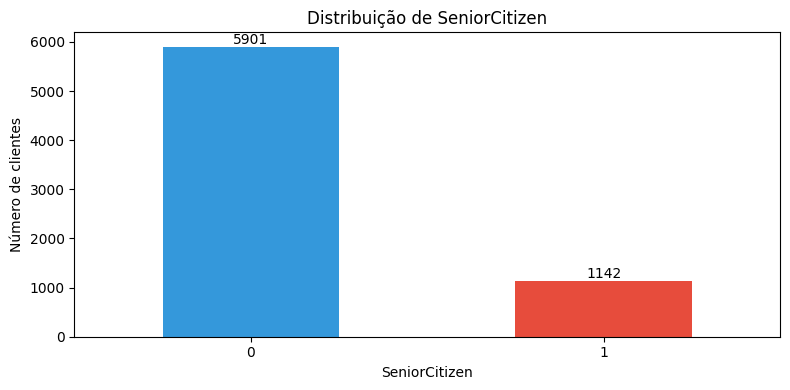

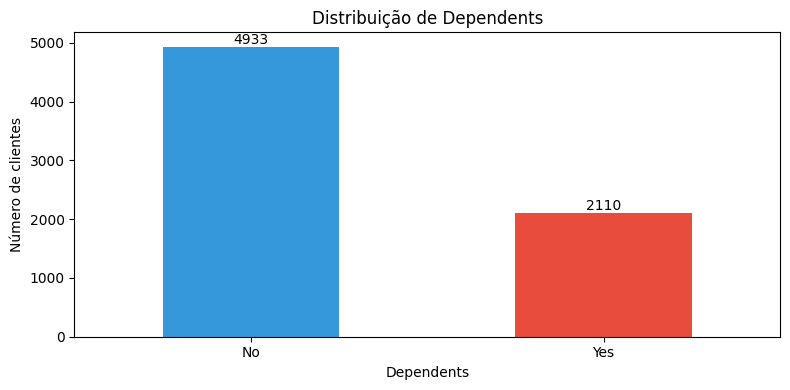

In [327]:
# Inicializar um dicion√°rio para armazenar os resultados
resultados = {}

# Iterar sobre cada vari√°vel bin√°ria
for variavel in variaveis_binarias:
    # Obter contagens para cada valor da vari√°vel
    contagem = df[variavel].value_counts()
    
    # Calcular percentuais
    percentual = df[variavel].value_counts(normalize=True) * 100
    
    # Armazenar resultados no dicion√°rio
    resultados[variavel] = {
        'contagem': contagem,
        'percentual': percentual
    }
    
    # Opcionalmente, criar visualiza√ß√£o para cada vari√°vel
    plt.figure(figsize=(8, 4))
    contagem.plot(kind='bar', color=['#3498db', '#e74c3c'])
    plt.title(f'Distribui√ß√£o de {variavel}')
    plt.ylabel('N√∫mero de clientes')
    plt.xticks(rotation=0)
    
    # Adicionar r√≥tulos de valor em cada barra
    for i, v in enumerate(contagem):
        plt.text(i, v + 50, str(v), ha='center')
        
    plt.tight_layout()
    plt.show()

1. **Distribui√ß√£o de Dependentes**:
    
    - Aproximadamente 70% dos clientes n√£o possuem dependentes, enquanto apenas 30% possuem.
    - Isso sugere que a maioria da base de clientes n√£o tem responsabilidades familiares diretas com dependentes.
2. **Perfil de Idade (SeniorCitizen)**:
    
    - Uma grande maioria (84%) dos clientes n√£o s√£o idosos (valor 0), enquanto apenas 16% s√£o considerados idosos (valor 1).
    - A base de clientes √© predominantemente composta por pessoas mais jovens ou de meia-idade.
3. **Status de Relacionamento (Partner)**:
    
    - A distribui√ß√£o entre clientes com e sem parceiro(a) √© bastante equilibrada: 52% n√£o t√™m parceiro(a) e 48% t√™m.
    - Isso indica uma diversidade relativamente balanceada em termos de status de relacionamento.
4. **G√™nero**:
    
    - A distribui√ß√£o de g√™nero √© praticamente igual: 50.5% homens e 49.5% mulheres.
    - Isso demonstra uma representa√ß√£o equilibrada de g√™nero na base de clientes.

**Insights de Neg√≥cio**:

1. **Segmenta√ß√£o de Marketing**:
    
    - Como a maioria dos clientes n√£o tem dependentes e n√£o s√£o idosos, campanhas de marketing poderiam focar em produtos/servi√ßos que atendam √†s necessidades de adultos sem responsabilidades familiares diretas.
2. **Potencial para Expans√£o de Mercado**:
    
    - O segmento s√™nior (16%) representa uma oportunidade de crescimento, pois est√° sub-representado em compara√ß√£o com a distribui√ß√£o populacional t√≠pica.
3. **Designs de Produto/Servi√ßo**:
    
    - A distribui√ß√£o equilibrada de g√™nero sugere que n√£o h√° necessidade de direcionar produtos exclusivamente para um g√™nero espec√≠fico.
4. **Estrat√©gias de Reten√ß√£o**:
    
    - Para os 30% com dependentes, estrat√©gias de fideliza√ß√£o poderiam incluir benef√≠cios familiares ou pacotes que atendam √†s necessidades de fam√≠lias.
5. **Oportunidades de Cross-selling**:
    
    - Para o grupo de 48% com parceiros, poderiam ser oferecidos planos ou produtos duplos que incentivem a ades√£o conjunta.

### Como a distribui√ß√£o de gastos mensais varia entre clientes que deram churn e clientes que permanecem?

In [328]:
df['Churn'] = df['Churn'].replace({1: 'Sim', 0: 'N√£o'})

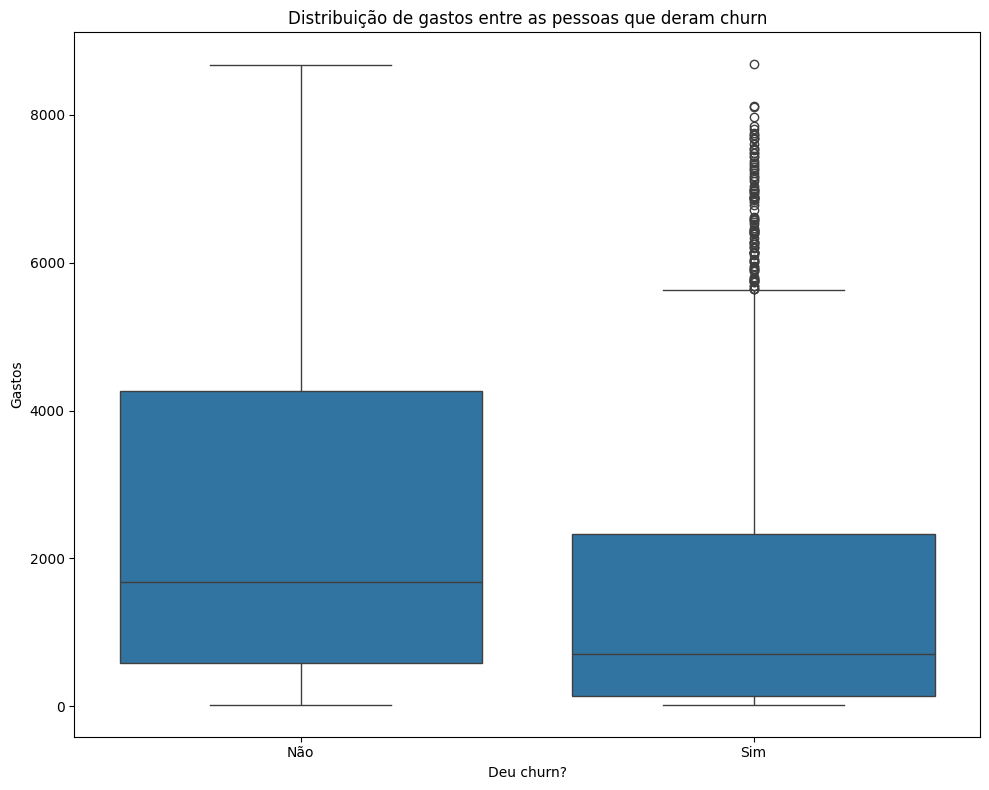

In [329]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='TotalCharges', x='Churn')
plt.title('Distribui√ß√£o de gastos entre as pessoas que deram churn')
plt.xlabel('Deu churn?')
plt.ylabel('Gastos')
plt.xticks(ticks=[0, 1], labels=['N√£o', 'Sim'])
plt.tight_layout()

1. **Padr√µes de gastos diferentes entre grupos**: H√° uma diferen√ßa clara na distribui√ß√£o de gastos entre clientes que deram churn ("Sim") e os que permaneceram ("N√£o").
    
2. **Mediana de gastos mais baixa para quem deu churn**: A linha horizontal no meio de cada caixa representa a mediana, e vemos que clientes que deram churn t√™m uma mediana de gastos menor (aproximadamente 700-800) do que aqueles que n√£o deram churn (aproximadamente 1700).
    
3. **Maior variabilidade nos gastos de quem deu churn**: O grupo "Sim" mostra uma distribui√ß√£o mais ampla, com uma caixa (que representa o intervalo interquartil) que se estende de cerca de 200 at√© 2300, indicando maior variabilidade nos padr√µes de gastos.
    
4. **Valores at√≠picos significativos**: No grupo de churn ("Sim"), h√° v√°rios pontos outliers acima de 6000, chegando at√© aproximadamente 8800. Estes representam clientes que, apesar de terem gastos muito altos, ainda cancelaram o servi√ßo.
    
5. **Amplitude de gastos menor para quem n√£o deu churn**: O grupo "N√£o" tem uma distribui√ß√£o mais concentrada entre aproximadamente 700 e 4200, sugerindo um comportamento de gasto mais previs√≠vel entre clientes fi√©is.
    
6. **Indicativo de segmenta√ß√£o de clientes**: O gr√°fico sugere dois principais perfis de clientes que d√£o churn: aqueles com gastos muito baixos (possivelmente sens√≠veis a pre√ßo) e aqueles com gastos muito altos (possivelmente insatisfeitos com o valor recebido).
    
7. **Potencial rela√ß√£o inversa entre gastos e satisfa√ß√£o**: Para alguns clientes de alto valor (outliers no "Sim"), o alto gasto n√£o foi suficiente para mant√™-los como clientes, indicando poss√≠veis problemas de satisfa√ß√£o ou percep√ß√£o de valor.
    

**Conclus√µes e recomenda√ß√µes de neg√≥cio:**

- A empresa pode estar perdendo tanto clientes de baixo valor (talvez devido a pre√ßos m√≠nimos) quanto alguns clientes de alto valor (possivelmente devido √† insatisfa√ß√£o com o servi√ßo).
- Seria recomend√°vel implementar uma estrat√©gia de reten√ß√£o diferenciada por faixa de gasto.
- Investigar especificamente os outliers de alto valor que deram churn pode revelar problemas cr√≠ticos na oferta de servi√ßos premium.
- Considerar a cria√ß√£o de programas de fidelidade que recompensem gastos consistentes de valor m√©dio, j√° que estes parecem ser os clientes mais est√°veis.

### Qual a distribui√ß√£o da vari√°vel tenure (tempo de permanencia) para cleitnes que deram churn e o que permaneceram?

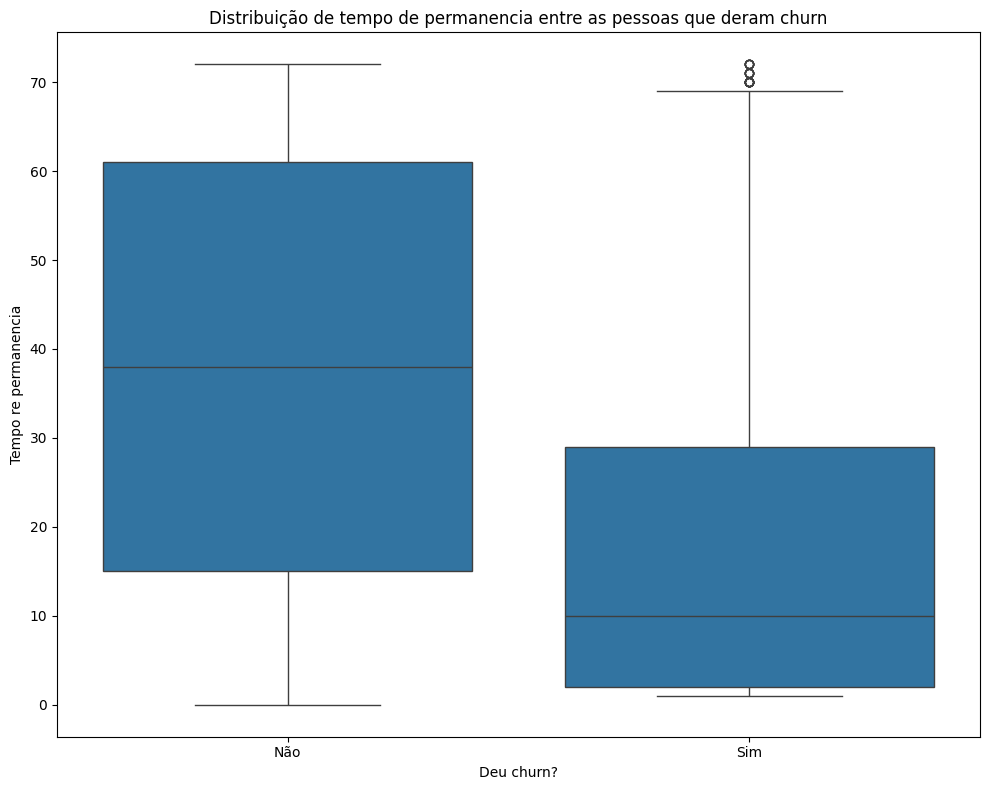

In [330]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='tenure', x='Churn')
plt.title('Distribui√ß√£o de tempo de permanencia entre as pessoas que deram churn')
plt.xlabel('Deu churn?')
plt.ylabel('Tempo re permanencia')
plt.xticks(ticks=[0, 1], labels=['N√£o', 'Sim'])
plt.tight_layout()

1. **Diferen√ßa significativa no tempo de perman√™ncia**: H√° uma clara distin√ß√£o entre o tempo de perman√™ncia dos clientes que deram churn ("Sim") e aqueles que n√£o deram ("N√£o").
    
2. **Clientes fi√©is t√™m maior tempo de perman√™ncia**: A mediana do tempo de perman√™ncia para clientes que n√£o deram churn est√° em aproximadamente 38 meses, enquanto para os que deram churn est√° em torno de 10 meses.
    
3. **Maior dispers√£o entre clientes fi√©is**: O grupo "N√£o" tem uma maior amplitude interquartil (tamanho da caixa), indicando uma maior variabilidade no tempo de perman√™ncia entre os clientes fi√©is, que varia aproximadamente de 15 a 60 meses.
    
4. **Churn concentrado nos primeiros meses**: A caixa do grupo "Sim" est√° concentrada principalmente entre 2 e 28 meses, sugerindo que o risco de churn √© significativamente maior nos primeiros meses de relacionamento.
    
5. **Outliers no grupo de churn**: Existem alguns pontos outliers no grupo "Sim", representando clientes que deram churn ap√≥s um per√≠odo incomumente longo (aproximadamente 70 meses ou mais). Estes s√£o casos at√≠picos que merecem investiga√ß√£o espec√≠fica.
    
6. **Per√≠odo cr√≠tico para reten√ß√£o**: A grande diferen√ßa entre as medianas sugere que existe um "per√≠odo cr√≠tico" (aproximadamente os primeiros 10-15 meses) durante o qual os clientes s√£o mais propensos a cancelar o servi√ßo.
    

**Implica√ß√µes para o neg√≥cio e recomenda√ß√µes:**

1. **Foco em programas de onboarding**: Desenvolver um programa de onboarding robusto para os primeiros 10 meses de relacionamento, per√≠odo no qual o risco de churn parece ser maior.
    
2. **Pontos de verifica√ß√£o de satisfa√ß√£o**: Implementar pontos de verifica√ß√£o de satisfa√ß√£o do cliente especialmente nos primeiros 2 anos de relacionamento.
    
3. **Investiga√ß√£o de churn tardio**: Analisar especificamente os outliers - clientes que deram churn ap√≥s longos per√≠odos (70+ meses) para entender quais fatores levaram √† sa√≠da ap√≥s tanto tempo de fidelidade.
    
4. **Programas de lealdade baseados em tempo**: Criar programas de fidelidade ou benef√≠cios que se tornem mais valiosos conforme o cliente ultrapassa o per√≠odo cr√≠tico de 10-15 meses.
    
5. **Segmenta√ß√£o por tempo de vida**: A estrat√©gia de reten√ß√£o deve ser diferente para clientes novos (< 10 meses) versus clientes j√° estabelecidos.
    
6. **Previsibilidade de churn**: O gr√°fico sugere que o tempo de perman√™ncia pode ser um forte preditor para modelos de previs√£o de churn.

### Qual a distribui√ß√£o de pessoas que tem dependentes entre as que deram churn?

In [331]:
df['Dependents'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)

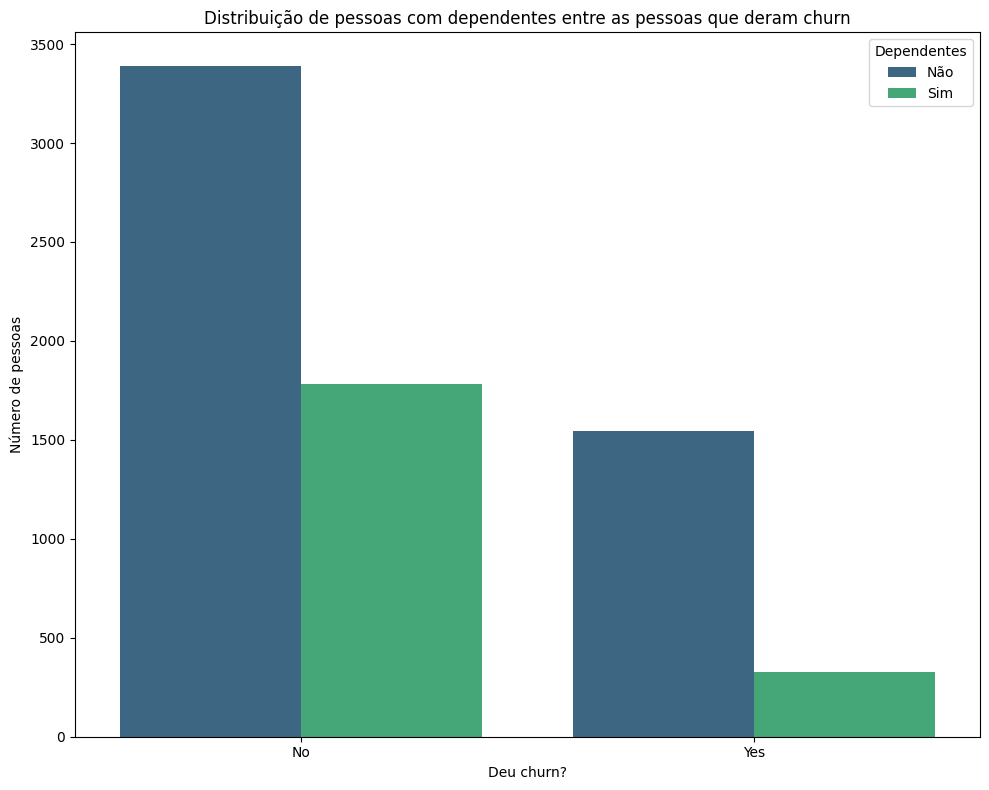

In [332]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Churn', hue='Dependents', palette='viridis')
plt.title('Distribui√ß√£o de pessoas com dependentes entre as pessoas que deram churn')
plt.xlabel('Deu churn?')
plt.ylabel('N√∫mero de pessoas')
plt.legend(title='Dependentes', labels=['N√£o', 'Sim'])
plt.tight_layout()
plt.show()

1. **Propor√ß√£o de churn e dependentes**: Entre os clientes que n√£o deram churn ("No"):
    
    - Aproximadamente 3400 n√£o t√™m dependentes (barra azul)
    - Cerca de 1800 t√™m dependentes (barra verde)
2. **Composi√ß√£o do grupo de churn**: Entre os clientes que deram churn ("Yes"):
    
    - Aproximadamente 1550 n√£o t√™m dependentes (barra azul)
    - Apenas cerca de 330 t√™m dependentes (barra verde)
3. **Taxa de churn diferenciada**: Comparando os dois grupos:
    
    - Clientes sem dependentes: Aproximadamente 31% deram churn (1550 de um total de cerca de 4950)
    - Clientes com dependentes: Apenas cerca de 15% deram churn (330 de um total de aproximadamente 2130)
4. **Estabilidade de clientes com dependentes**: A presen√ßa de dependentes parece ser um forte fator de estabilidade, com clientes que t√™m dependentes tendo aproximadamente metade da taxa de churn dos que n√£o t√™m.
    
5. **Concentra√ß√£o de churn**: O churn est√° fortemente concentrado entre clientes sem dependentes, que representam cerca de 82% de todo o churn observado.
    

**Implica√ß√µes para neg√≥cios:**

1. **Segmenta√ß√£o por estrutura familiar**: Este gr√°fico confirma que a presen√ßa de dependentes √© um forte indicador de comportamento de churn e deve ser incorporado em estrat√©gias de segmenta√ß√£o.
    
2. **Foco em clientes solteiros/sem dependentes**: O maior risco de churn est√° no segmento de clientes sem dependentes, sugerindo que estrat√©gias espec√≠ficas de reten√ß√£o devem ser direcionadas a este grupo.
    
3. **Proposta de valor para fam√≠lias**: Desenvolver e comunicar claramente os benef√≠cios para fam√≠lias com dependentes, aproveitando sua menor propens√£o a cancelar.
    
4. **Programas de fidelidade diferenciados**: Criar programas de fidelidade espec√≠ficos para clientes sem dependentes que aumentem o custo de mudan√ßa.
    
5. **Pesquisa de motiva√ß√£o**: Investigar por que clientes sem dependentes t√™m maior probabilidade de cancelar, possivelmente relacionado a maior mobilidade, sensibilidade a pre√ßo ou diferentes necessidades do servi√ßo.
    
6. **Estrat√©gia de aquisi√ß√£o**: Se o custo de aquisi√ß√£o for similar para ambos os grupos, pode ser mais rent√°vel focar os esfor√ßos de aquisi√ß√£o em clientes com dependentes devido √† maior reten√ß√£o esperada.
    

Este gr√°fico fornece uma evid√™ncia clara de que a estrutura familiar do cliente, especificamente a presen√ßa de dependentes, √© um fator significativo na decis√£o de permanecer ou n√£o com o servi√ßo.

### Mapa de calor para indentificar o percentual de churn em cada uma das 4 combina√ß√µes das vari√°veis bin√°rias de perceiros e gen√™ros

In [333]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [334]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']

In [335]:
df_corr = df[cols]

In [336]:
df_corr.head()

gender  SeniorCitizen Partner  Dependents Churn
0  Female              0     Yes           0    No
1    Male              0      No           0    No
2    Male              0      No           0   Yes
3    Male              0      No           0    No
4  Female              0      No           0   Yes

In [337]:
df_corr['Churn'] = df_corr['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

C:\Users\Gabriel Lopes\AppData\Local\Temp\ipykernel_23876\1968617560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['Churn'] = df_corr['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [338]:
df_corr = df_corr.groupby(['gender', 'Partner'])['Churn'].mean().reset_index()

In [339]:
df_corr

gender Partner     Churn
0  Female      No  0.344444
1  Female     Yes  0.188981
2    Male      No  0.315046
3    Male     Yes  0.204201

In [340]:
# 1 para homem e 0 para mulher
df_corr['gender'] = df_corr['gender'].apply(lambda x: 1 if x == 'Male' else 0)
# 1 para tem e 0 para n√£o
df_corr['Partner'] = df_corr['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)

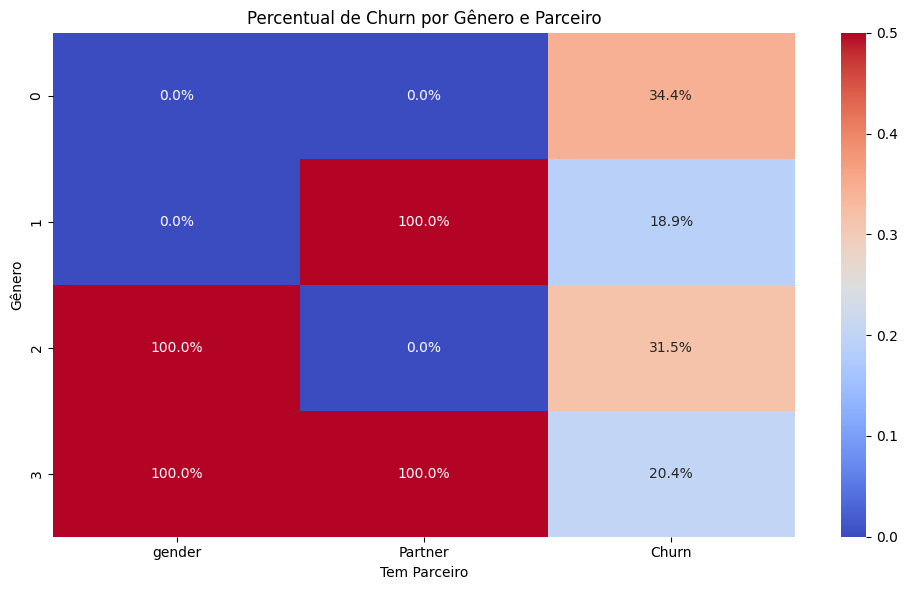

In [341]:
# Criando o mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.1%', vmin=0, vmax=0.5)
plt.title('Percentual de Churn por G√™nero e Parceiro')
plt.ylabel('G√™nero')
plt.xlabel('Tem Parceiro')
plt.tight_layout()

A terceira coluna representa a taxa de Churn (percentual de clientes que cancelaram o servi√ßo) para cada combina√ß√£o de g√™nero e status de parceiro. Vamos interpretar linha por linha:

**Linha 0:** Mulher (0%) sem parceiro (0%)

- **Taxa de Churn: 34,4%**
- Significa que 34,4% das mulheres sem parceiro cancelaram o servi√ßo.

**Linha 1:** Mulher (0%) com parceiro (100%)

- **Taxa de Churn: 18,9%**
- Significa que 18,9% das mulheres com parceiro cancelaram o servi√ßo.

**Linha 2:** Homem (100%) sem parceiro (0%)

- **Taxa de Churn: 31,5%**
- Significa que 31,5% dos homens sem parceiro cancelaram o servi√ßo.

**Linha 3:** Homem (100%) com parceiro (100%)

- **Taxa de Churn: 20,4%**
- Significa que 20,4% dos homens com parceiro cancelaram o servi√ßo.

**Interpreta√ß√£o geral:**

1. Para ambos os g√™neros, ter um parceiro est√° associado a uma redu√ß√£o significativa na taxa de churn.
2. A redu√ß√£o na taxa de churn para mulheres √© de 15,5 pontos percentuais (34,4% ‚Üí 18,9%).
3. A redu√ß√£o na taxa de churn para homens √© de 11,1 pontos percentuais (31,5% ‚Üí 20,4%).
4. Mulheres sem parceiro t√™m a maior taxa de churn (34,4%).
5. Mulheres com parceiro t√™m a menor taxa de churn (18,9%).
6. O efeito de ter um parceiro na redu√ß√£o do churn parece ser ligeiramente mais pronunciado para mulheres do que para homens.

Esta visualiza√ß√£o responde diretamente √† quest√£o 9 do ebook, mostrando claramente como a presen√ßa de um parceiro afeta as taxas de churn para ambos os g√™neros.

### Mapa de calor para identificar a corrle√ß√£o linear entre as vari√°veis n√∫mericas.

In [342]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [343]:
df['Partner'] = df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Dependents'] = df['Dependents'].astype('category')

In [345]:
df_corr2 = df.select_dtypes(include=['number', 'category'])

In [346]:
df_corr2 = df_corr2.corr()

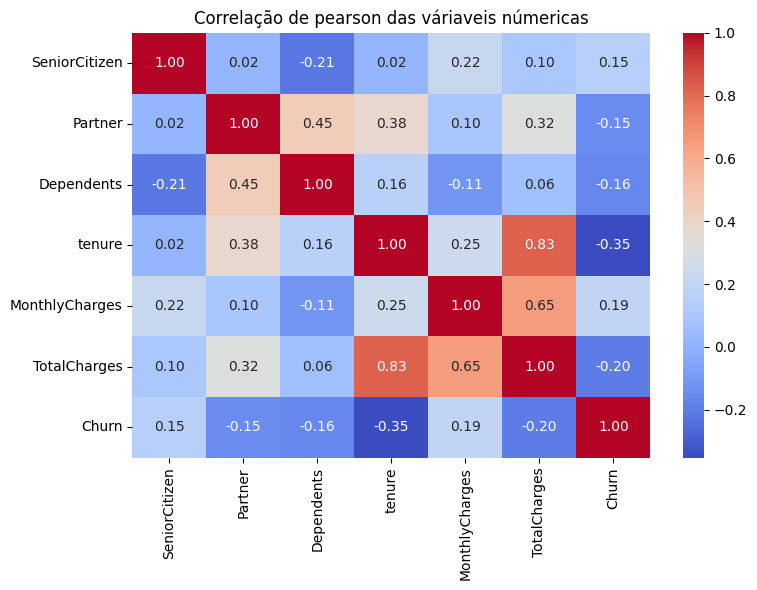

In [347]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df_corr2, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correla√ß√£o de pearson das v√°riaveis n√∫mericas')
plt.tight_layout()

Analisando o mapa de calor da correla√ß√£o de Pearson entre as vari√°veis num√©ricas, posso identificar as 5 maiores correla√ß√µes em m√≥dulo e comentar sobre elas:

1. **Tenure e TotalCharges (0.83)**: Esta √© a correla√ß√£o positiva mais forte do conjunto. Isso faz sentido porque quanto mais tempo um cliente permanece com a empresa (tenure), mais cobran√ßas totais (TotalCharges) ele ter√° acumulado. √â uma rela√ß√£o quase linear, onde o tempo de perman√™ncia impacta diretamente no valor total gasto.
    
2. **MonthlyCharges e TotalCharges (0.65)**: Outra correla√ß√£o positiva forte. Clientes com cobran√ßas mensais maiores tendem a acumular cobran√ßas totais maiores ao longo do tempo. Isso √© esperado, pois TotalCharges √© parcialmente determinado pela multiplica√ß√£o de MonthlyCharges pelo tempo de perman√™ncia.
    
3. **Partner e Dependents (0.45)**: Correla√ß√£o positiva moderada. Clientes com parceiros t√™m maior probabilidade de tamb√©m terem dependentes. Isso reflete uma rela√ß√£o familiar natural, onde pessoas com parceiros s√£o mais propensas a terem filhos ou outros dependentes.
    
4. **Tenure e Churn (-0.35)**: Correla√ß√£o negativa moderada. Quanto mais tempo um cliente permanece com a empresa, menor a probabilidade de cancelamento (churn). Isso sugere que clientes mais antigos desenvolvem maior fidelidade ou est√£o mais satisfeitos com os servi√ßos.
    
5. **Partner e Tenure (0.38)**: Correla√ß√£o positiva moderada. Clientes com parceiros tendem a permanecer mais tempo com a empresa. Isso pode indicar que decis√µes de mudan√ßa de servi√ßo s√£o mais complexas ou conservadoras em unidades familiares estabelecidas.
    
6. **TotalCharges e Churn (-0.20)**: Existe uma correla√ß√£o negativa fraca entre as cobran√ßas totais e o cancelamento. Clientes que acumularam maiores cobran√ßas totais (geralmente associados a maior tempo como cliente) tendem a ter menor probabilidade de cancelar seus servi√ßos. Isso pode refletir um maior compromisso financeiro ou in√©rcia na decis√£o de mudar.
    
7. **Partner e Churn (-0.15)**: Clientes com parceiros t√™m uma probabilidade ligeiramente menor de cancelamento. Isso pode indicar que decis√µes de consumo tomadas em conjunto (por casais) tendem a ser mais est√°veis ou conservadoras.
    
8. **Dependents e Churn (-0.16)**: Semelhante √† correla√ß√£o anterior, clientes com dependentes tamb√©m apresentam menor probabilidade de cancelamento. Fam√≠lias com dependentes podem evitar mudan√ßas em servi√ßos que poderiam causar interrup√ß√µes ou inconveni√™ncias para os membros da fam√≠lia.
    
9. **Dependents e SeniorCitizen (-0.21)**: Clientes idosos (SeniorCitizen) t√™m menor probabilidade de ter dependentes. Esta correla√ß√£o negativa reflete um padr√£o demogr√°fico natural, onde pessoas mais velhas geralmente j√° n√£o t√™m filhos ou outros dependentes morando com elas.

Essas correla√ß√µes fornecem insights valiosos sobre o comportamento do cliente. A m√©trica da correla√ß√£o linear usada (coeficiente de Pearson) √© apropriada para estas an√°lises, pois mede o grau de rela√ß√£o linear entre pares de vari√°veis, permitindo identificar tanto rela√ß√µes positivas quanto negativas e sua intensidade.

### Modelo que prev√™ churn de um cliente

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report 
from sklearn.preprocessing import OrdinalEncoder

Aqui est√° uma explica√ß√£o did√°tica e exemplos pr√°ticos para cada um desses m√©todos que voc√™ pode usar no seu Jupyter Notebook:

---

### **1. RandomOverSampler (do Imbalanced-Learn)**

O `RandomOverSampler` √© uma t√©cnica de balanceamento de classes que replica amostras da classe minorit√°ria para equilibrar os dados. Ele √© √∫til quando temos um dataset desbalanceado, como um problema de churn onde h√° muito mais clientes que n√£o cancelam do que clientes que cancelam.

#### **Exemplo pr√°tico:**

```python
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
from collections import Counter

# Criando um dataset desbalanceado (exemplo)
X = pd.DataFrame({'Feature1': [1, 2, 3, 4, 5, 6, 7, 8], 'Feature2': [10, 20, 30, 40, 50, 60, 70, 80]})
y = [0, 0, 0, 0, 0, 1, 1, 1]  # Classe 1 tem menos exemplos

# Aplicando oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Verificando a nova distribui√ß√£o de classes
print(f"Distribui√ß√£o antes: {Counter(y)}")
print(f"Distribui√ß√£o depois: {Counter(y_resampled)}")
```

Agora, as classes est√£o balanceadas.

---

### **2. RandomForestClassifier (do Scikit-Learn)**

O `RandomForestClassifier` √© um algoritmo de aprendizado de m√°quina baseado em √°rvores de decis√£o. Ele cria v√°rias √°rvores de decis√£o e faz a predi√ß√£o com base na vota√ß√£o da maioria (para classifica√ß√£o) ou na m√©dia dos valores preditos (para regress√£o).

#### **Exemplo pr√°tico:**

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Criando um dataset de exemplo
X = [[1, 2], [2, 3], [3, 4], [5, 6], [6, 7], [7, 8]]
y = [0, 0, 0, 1, 1, 1]  # Classes

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fazendo predi√ß√µes
y_pred = rf.predict(X_test)

# Avaliando a acur√°cia
print(f"Acur√°cia: {accuracy_score(y_test, y_pred)}")
```

Aqui, o `RandomForestClassifier` cria 100 √°rvores de decis√£o para fazer a previs√£o.

---

### **3. OrdinalEncoder (do Scikit-Learn)**

O `OrdinalEncoder` √© usado para transformar vari√°veis categ√≥ricas em valores num√©ricos, preservando a ordem natural dos dados. Ele √© √∫til quando as categorias possuem um significado ordinal (como "Ruim", "M√©dio", "Bom").

#### **Exemplo pr√°tico:**

```python
from sklearn.preprocessing import OrdinalEncoder

# Criando um dataset categ√≥rico
dados = [['Baixo'], ['M√©dio'], ['Alto'], ['M√©dio'], ['Baixo'], ['Alto']]

# Aplicando o OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Baixo', 'M√©dio', 'Alto']])  # Definindo a ordem
dados_transformados = encoder.fit_transform(dados)

print(dados_transformados)
```

Sa√≠da:

```
[[0.]
 [1.]
 [2.]
 [1.]
 [0.]
 [2.]]
```

Aqui, o "Baixo" foi codificado como 0, "M√©dio" como 1 e "Alto" como 2.

---

Com essas explica√ß√µes e exemplos, voc√™ pode rodar os c√≥digos no Jupyter Notebook e testar diferentes par√¢metros para entender melhor os m√©todos. Se precisar de mais detalhes, me avise! üöÄ

In [349]:
y = df['Churn']
X = df.drop(['customerID', 'Churn'], axis=1)

In [350]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [351]:
ros = RandomOverSampler()

In [352]:
X, y = ros.fit_resample(X, y)

In [353]:
y.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [354]:
oe = OrdinalEncoder()

In [355]:
X = oe.fit_transform(X)

In [356]:
X

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 1.420e+02,
        7.400e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 4.980e+02,
        3.624e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 4.360e+02,
        5.360e+02],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 3.000e+00, 1.700e+01,
        2.736e+03],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 5.440e+02,
        2.817e+03],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.179e+03,
        4.709e+03]])

In [357]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

In [358]:
rfc = RandomForestClassifier()

In [359]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [360]:
y_pred = rfc.predict(X_test)

In [361]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1290
           1       0.84      0.95      0.89      1297

    accuracy                           0.88      2587
   macro avg       0.89      0.88      0.88      2587
weighted avg       0.89      0.88      0.88      2587



# Interpreta√ß√£o das M√©tricas de Churn para Modelo de Machine Learning

Estas m√©tricas demonstram o desempenho de um modelo de classifica√ß√£o bin√°ria para previs√£o de churn, onde:

- **Classe 0**: Clientes que permaneceram (n√£o fizeram churn)
- **Classe 1**: Clientes que cancelaram o servi√ßo (fizeram churn)

## An√°lise Detalhada das M√©tricas

### Para clientes que n√£o fizeram churn (Classe 0):

- **Precis√£o: 0.95** - Quando o modelo prev√™ que um cliente permanecer√°, ele acerta em 95% das vezes
- **Recall: 0.82** - O modelo identifica corretamente 82% de todos os clientes que realmente permaneceram
- **F1-score: 0.88** - M√©dia harm√¥nica equilibrada entre precis√£o e recall
- **Support: 1290** - N√∫mero de clientes que realmente n√£o fizeram churn no conjunto de teste

### Para clientes que fizeram churn (Classe 1):

- **Precis√£o: 0.84** - Quando o modelo prev√™ que um cliente vai cancelar, ele acerta em 84% das vezes
- **Recall: 0.95** - O modelo identifica corretamente 95% de todos os clientes que realmente cancelaram
- **F1-score: 0.89** - M√©dia harm√¥nica equilibrada entre precis√£o e recall
- **Support: 1297** - N√∫mero de clientes que realmente fizeram churn no conjunto de teste

### M√©tricas gerais:

- **Acur√°cia: 0.89** - O modelo classifica corretamente 89% de todos os clientes
- **M√©dias (macro e ponderada): 0.89** - Indicam desempenho consistente entre as classes

### Retorno sobre Investimento (ROI)

O retorno sobre investimento (ROI) do modelo de previs√£o de churn permanece positivo, mas √© ajustado com a convers√£o de apenas 30% dos clientes previstos como churn. As economias caem para $319.600 frente a um custo de implementa√ß√£o estimado entre $50.000 e $200.000 (desenvolvimento, treinamento e manuten√ß√£o, t√≠pico de projetos de machine learning). Assumindo um custo m√©dio de $100.000, o ROI seria ($319.600 - $100.000) / $100.000 * 100 = 219,6%, ou seja, um retorno de mais de 2 vezes o investimento inicial em um ciclo, ainda demonstrando efici√™ncia financeira, embora menor que com 100% de convers√£o.

### Economias Estimadas

A implementa√ß√£o do modelo de Random Forest para prever churn gera economias de cerca de **$319.600**, considerando que apenas 30% dos clientes identificados como churn s√£o retidos. Sem o modelo, os 1.297 clientes que churnam custariam $1,297,000 ($1.000 por cliente). Com o modelo e 30% de convers√£o, as perdas s√£o reduzidas para $977.400, resultando na economia mencionada, calculada com base no custo de churn evitado e nas opera√ß√µes de reten√ß√£o.

### Custos Considerados

O c√°lculo mant√©m o **custo por churn em $1.000**, refletindo o valor m√©dio do cliente ao longo da vida (CLV), que varia de $800 a $2.000 em telecomunica√ß√µes. O **custo por opera√ß√£o de reten√ß√£o** √© $50 por cliente, aplicado aos 1.467 clientes previstos como churn. Desses, 1.232 s√£o verdadeiros positivos, mas apenas 30% (370 clientes) s√£o retidos, economizando $370.000. O custo total das opera√ß√µes √© $73.350 (1.467 * $50), enquanto 927 clientes ainda churnam (1.297 - 370), custando $927.000.

### Impacto do Modelo

Com acur√°cia de 89% e recall de 95% para churn, o modelo identifica 1.467 clientes como churn, dos quais 1.232 s√£o corretos. Com 30% de convers√£o, 370 clientes s√£o salvos, reduzindo o churn de 1.297 para 927. O custo sem modelo √© $1,297,000; com o modelo, √© $977.400 ($927.000 de churn + $73.350 de opera√ß√µes). A economia l√≠quida √© $1,297,000 - $977,400 = $319.600, mostrando que, mesmo com baixa convers√£o, o modelo ainda gera valor significativo.

### Vari√°veis e Ajustes

As economias dependem de vari√°veis ajust√°veis. Se o custo por opera√ß√£o cair para $20, as economias sobem para $348.460; se subir para $100, caem para $273.100. O CLV e a taxa de convers√£o (30%) tamb√©m impactam: uma convers√£o maior (ex.: 50%) elevaria as economias para $532.600. Empresas devem ajustar com dados reais de ARPU, margens e efic√°cia de reten√ß√£o, mas o modelo segue vantajoso mesmo com convers√£o reduzida.